In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import warnings

In [2]:
# Example Data

data_with_weather = [{'average_rain': 1.3043003068645171, 'average_temp': 12.680280807174727, 'lga_code': 23270, 'suburb_name': 'Hume', 'total_a_offences': 2636, 'total_b_offences': 9303, 'total_offences': 15661}, {'average_rain': 0.9035249457700651, 'average_temp': 12.999489327077837, 'lga_code': 23430, 'suburb_name': 'Kingston', 'total_a_offences': 1187, 'total_b_offences': 5542, 'total_offences': 8646}, {'average_rain': 0.6556520061728395, 'average_temp': 12.385267150576835, 'lga_code': 23670, 'suburb_name': 'Knox', 'total_a_offences': 1215, 'total_b_offences': 4990, 'total_offences': 8103}, {'average_rain': 1.3002885530235677, 'average_temp': 12.748965121305847, 'lga_code': 22830, 'suburb_name': 'Greater Shepparton', 'total_a_offences': 1090, 'total_b_offences': 3267, 'total_offences': 6241}, {'average_rain': 1.0162698412698412, 'average_temp': 11.002516446726709, 'lga_code': 27450, 'suburb_name': 'Yarra Ranges', 'total_a_offences': 976, 'total_b_offences': 3449, 'total_offences': 5781}, {'average_rain': 1.1353912667531343, 'average_temp': 12.826930392690413, 'lga_code': 23110, 'suburb_name': 'Hobsons Bay', 'total_a_offences': 837, 'total_b_offences': 2872, 'total_offences': 4852}, {'average_rain': 0.27112970711297074, 'average_temp': 12.526659281086184, 'lga_code': 26730, 'suburb_name': 'Warrnambool', 'total_a_offences': 619, 'total_b_offences': 1424, 'total_offences': 3017}, {'average_rain': 1.8805353505964504, 'average_temp': 13.095829723831892, 'lga_code': 21370, 'suburb_name': 'Campaspe', 'total_a_offences': 458, 'total_b_offences': 1642, 'total_offences': 2924}, {'average_rain': 0.4480262522922498, 'average_temp': 14.055660425160651, 'lga_code': 20740, 'suburb_name': 'Bass Coast', 'total_a_offences': 374, 'total_b_offences': 993, 'total_offences': 1784}, {'average_rain': 0.4664631346983748, 'average_temp': 8.70486180294969, 'lga_code': 26700, 'suburb_name': 'Wangaratta', 'total_a_offences': 360, 'total_b_offences': 714, 'total_offences': 1644}, {'average_rain': 0.0008915987499234022, 'average_temp': 12.034010966361661, 'lga_code': 23190, 'suburb_name': 'Horsham', 'total_a_offences': 371, 'total_b_offences': 548, 'total_offences': 1442}, {'average_rain': 1.156674625569785, 'average_temp': 14.475042319209813, 'lga_code': 21750, 'suburb_name': 'Colac Otway', 'total_a_offences': 325, 'total_b_offences': 653, 'total_offences': 1325}, {'average_rain': 0.13152397332102858, 'average_temp': 11.329493695834802, 'lga_code': 26260, 'suburb_name': 'Southern Grampians', 'total_a_offences': 223, 'total_b_offences': 386, 'total_offences': 1116}, {'average_rain': 0.15208575300038715, 'average_temp': 11.955044997662041, 'lga_code': 22410, 'suburb_name': 'Glenelg', 'total_a_offences': 181, 'total_b_offences': 442, 'total_offences': 963}, {'average_rain': 1.0307692307692309, 'average_temp': 9.451282183329264, 'lga_code': 21670, 'suburb_name': 'Central Goldfields', 'total_a_offences': 234, 'total_b_offences': 356, 'total_offences': 918}, {'average_rain': 0.7326047358834245, 'average_temp': 13.598087431108857, 'lga_code': 26490, 'suburb_name': 'Surf Coast', 'total_a_offences': 181, 'total_b_offences': 526, 'total_offences': 892}, {'average_rain': 0.08442119408715684, 'average_temp': 12.436734489091048, 'lga_code': 25810, 'suburb_name': 'Northern Grampians', 'total_a_offences': 213, 'total_b_offences': 314, 'total_offences': 768}, {'average_rain': 1.2125000000000001, 'average_temp': 14.677083260483212, 'lga_code': 22250, 'suburb_name': 'Gannawarra', 'total_a_offences': 121, 'total_b_offences': 287, 'total_offences': 585}, {'average_rain': 0.23063665516664894, 'average_temp': 12.807807347309858, 'lga_code': 25490, 'suburb_name': 'Moyne', 'total_a_offences': 135, 'total_b_offences': 215, 'total_offences': 460}, {'average_rain': 3.1115415969451243, 'average_temp': 12.660226542041196, 'lga_code': 26430, 'suburb_name': 'Strathbogie', 'total_a_offences': 129, 'total_b_offences': 237, 'total_offences': 446}, {'average_rain': 1.3196574690770695, 'average_temp': 4.401969547751231, 'lga_code': 20110, 'suburb_name': 'Alpine', 'total_a_offences': 114, 'total_b_offences': 161, 'total_offences': 399}, {'average_rain': 0.041025641025641026, 'average_temp': 12.515773137829106, 'lga_code': 23350, 'suburb_name': 'Indigo', 'total_a_offences': 79, 'total_b_offences': 203, 'total_offences': 371}, {'average_rain': 0.7533030044545541, 'average_temp': 5.018078859593236, 'lga_code': 24250, 'suburb_name': 'Mansfield', 'total_a_offences': 63, 'total_b_offences': 160, 'total_offences': 326}, {'average_rain': 0.3443007662835249, 'average_temp': 12.346058445473084, 'lga_code': 21270, 'suburb_name': 'Buloke', 'total_a_offences': 40, 'total_b_offences': 111, 'total_offences': 216}, {'average_rain': 0.015641762452107282, 'average_temp': 12.310828503498172, 'lga_code': 26890, 'suburb_name': 'West Wimmera', 'total_a_offences': 32, 'total_b_offences': 57, 'total_offences': 125}]

top_5_by_total_offences = sorted(data_with_weather, key=lambda x: x['total_offences'], reverse=True)[:10]
bottom_5_by_total_offences = sorted(data_with_weather, key=lambda x: x['total_offences'])[:10]

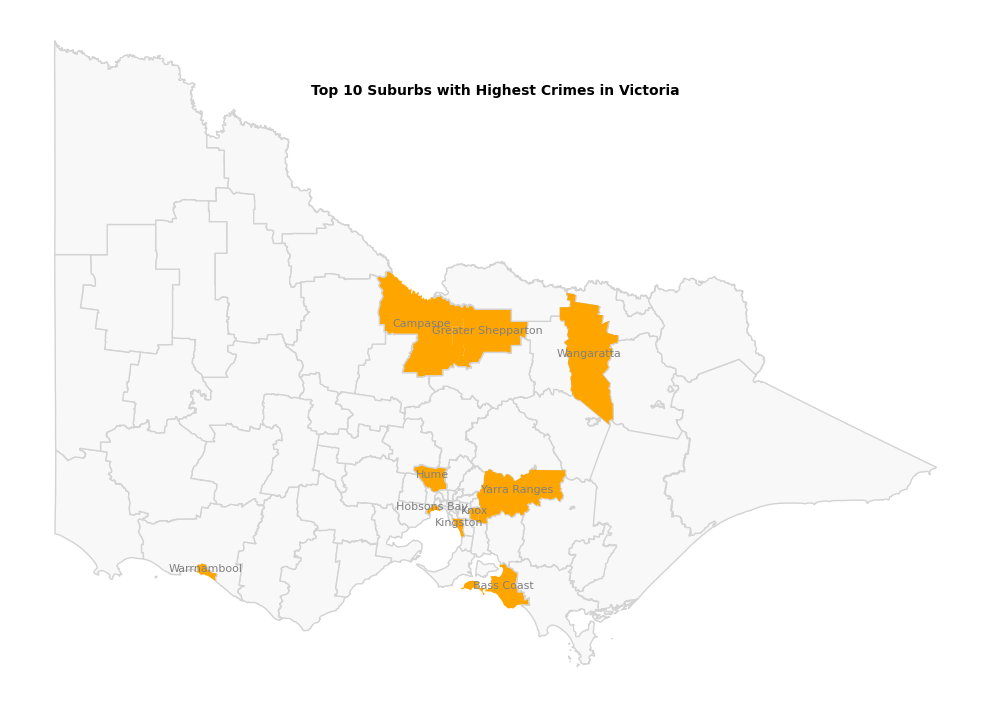

In [3]:
def plot_map(highlight_suburbs):
    gdf = gpd.read_file("../data/georef-australia-local-government-area@public.geojson")

    # All LGA area in GeoJson
    gdf['lga_name'] = gdf['lga_name'].str.join(', ')

    # Group the GeoDataFrame by 'lga_name'
    grouped = gdf.groupby('lga_name')
    _, ax = plt.subplots(figsize=(10, 8))
    for _, (name, group) in enumerate(grouped):
        if name in highlight_suburbs:
            warnings.filterwarnings("ignore", message="Geometry is in a geographic CRS")
            group.plot(ax=ax, label=name, color='orange')
            centroid = group['geometry'].centroid.iloc[0]
            ax.annotate(name, (centroid.x, centroid.y), fontsize=8, ha='center',color='gray')
        else:
            group.plot(ax=ax, label=name, color='#F8F8F8',edgecolor='lightgrey')

    # Plot with title
    plt.axis('off')
    plt.suptitle('Top 10 Suburbs with Highest Crimes in Victoria', y=0.82, fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()

all_suburbs = [entry['suburb_name'] for entry in top_5_by_total_offences]
plot_map(all_suburbs)

In [4]:
# map_titles = {
#     'crime':'Top 10 Suburbs with Highest Crimes (VIC)',
#     'temp':'Top 10 Suburbs with Highest Annual Temperature (VIC)',
#     'precip':'Top 10 Suburbs with Highest Annual Precipitation (VIC)'
# }

# gdf = gpd.read_file("../data/suburb-2-vic.geojson")

# def plot_map(map_type,highlight_suburbs):
#     map_title = map_titles[map_type]

#     # Plot all suburbs
#     gdf.plot(color='#F8F8F8',edgecolor='lightgrey',linewidth=0.5,figsize=(8, 8))

#     # Plot highlighted suburbs
#     highlight_color = 'orange'
#     highlighted_gdf = gdf[gdf['vic_loca_2'].isin(highlight_suburbs)]
#     highlighted_gdf.plot(color=highlight_color, ax=plt.gca())
#     # Create legend for highlighted suburbs
#     legend_elements = [Patch(facecolor=highlight_color, label=suburb) for suburb in highlight_suburbs]
#     plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

#     # Plot with title
#     plt.axis('off')
#     plt.suptitle(map_title, y=0.82, fontsize=10, fontweight='bold')
#     plt.tight_layout()
#     plt.show()
#     return None

# all_suburbs = [entry['suburb_name'].upper() for entry in top_5_by_total_offences]
# plot_map('crime',all_suburbs)

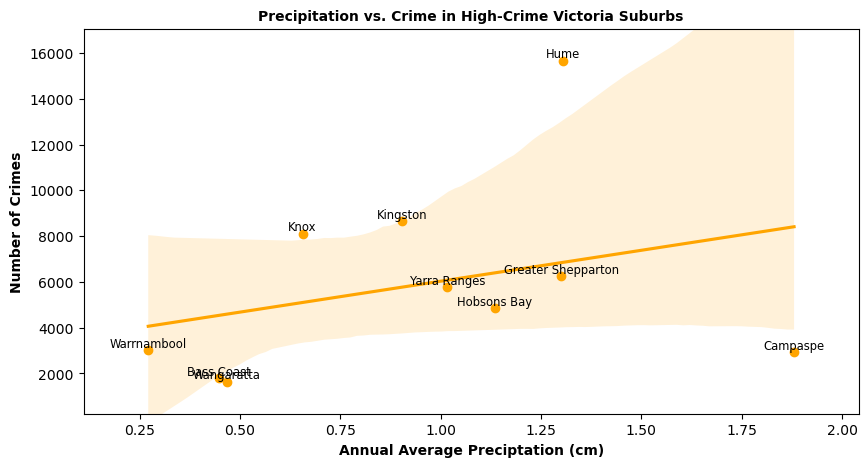

In [5]:
scatter_annotations = {
    'title': {
        'average_temp':'Temperature vs. Crime in High-Crime Victoria Suburbs',
        'average_rain':'Precipitation vs. Crime in High-Crime Victoria Suburbs'
    },
    'xlabel': {
        'average_temp':'Annual Average Temperature (°C)',
        'average_rain':'Annual Average Preciptation (cm)'
    }
}

def plot_scatter_chart(scatter_type,data):
    # Extracting data
    feature_data = [entry[scatter_type] for entry in data]
    count_data = [entry['total_offences'] for entry in data]
    suburbs = [entry['suburb_name'] for entry in data]

    # Create Scatter Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(feature_data, count_data, color='orange')

    # # Add Trend Line
    sns.regplot(x=feature_data, y=count_data, scatter=False, color='orange')

    # Add annotations for each suburb
    for i, suburb in enumerate(suburbs):
        plt.text(feature_data[i], count_data[i], suburb, ha='center', va='bottom', size='small')

    # Plot with title, xlabel, and ylabel
    plt.title(scatter_annotations['title'][scatter_type], fontweight='bold', fontsize=10)
    plt.xlabel(scatter_annotations['xlabel'][scatter_type], fontweight='bold')
    plt.ylabel('Number of Crimes', fontweight='bold')

    # Dynamically adjust limits
    x_range = max(feature_data) - min(feature_data)
    y_range = max(count_data) - min(count_data)
    x_padding = 0.1 * x_range
    y_padding = 0.1 * y_range

    plt.xlim(min(feature_data) - x_padding, max(feature_data) + x_padding)
    plt.ylim(min(count_data) - y_padding, max(count_data) + y_padding)
    plt.show()

# Example DataFrame with suburbs, temperature, and crime rate
plot_scatter_chart('average_rain',top_5_by_total_offences)

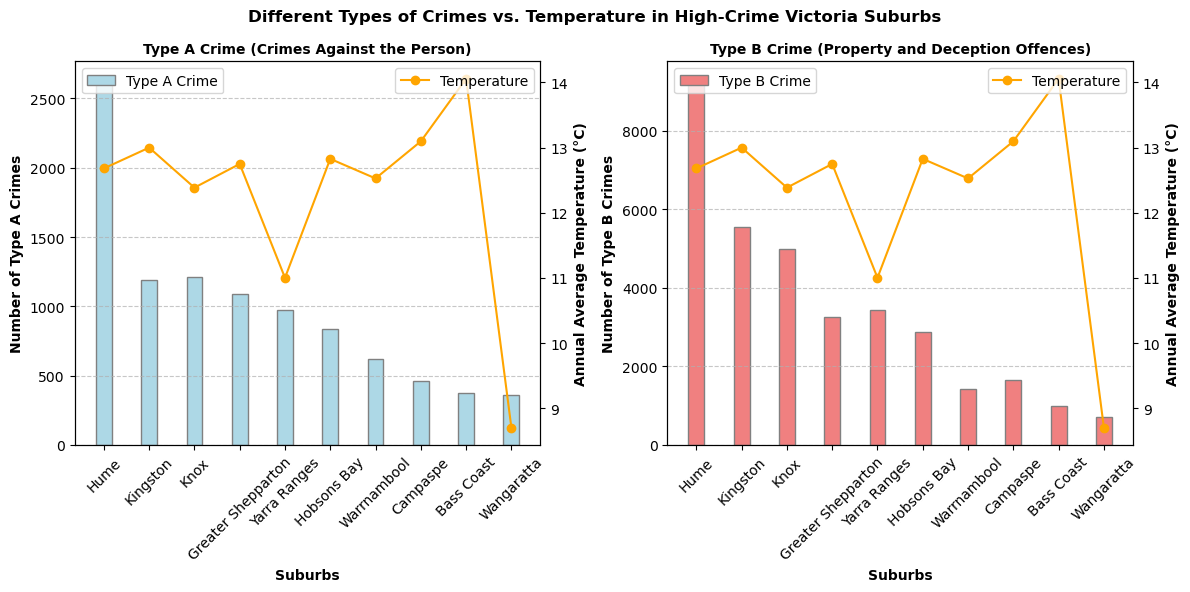

In [6]:
bar_annotations = {
    'title': {
        'average_temp':'Temperature',
        'average_rain':'Preciptation'
    },
    'ylabel': {
        'average_temp':'Annual Average Temperature (°C)',
        'average_rain':'Annual Average Preciptation (cm)'
    }
}

def plot_bar_chart(bar_type, data):
    # Extracting data
    suburbs = [entry['suburb_name'] for entry in data]
    total_a_offences = [entry['total_a_offences'] for entry in data]
    total_b_offences = [entry['total_b_offences'] for entry in data]
    feature_data = [entry[bar_type] for entry in data] # temperature or rain

    # Set up the data for plotting
    x = np.arange(len(suburbs))
    bar_width = 0.35

    # Increase the figure width
    plt.figure(figsize=(12, 6))

    # Subplot for Type A Crime
    plt.subplot(1, 2, 1)
    plt.bar(x, total_a_offences, bar_width, label='Type A Crime', color='#ADD8E6', edgecolor='grey')
    plt.xlabel('Suburbs',fontweight='bold')
    plt.ylabel('Number of Type A Crimes',fontweight='bold')
    plt.title(f"Type A Crime (Crimes Against the Person)", fontsize=10, fontweight='bold')
    plt.xticks(x, suburbs, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')

    # Temperature/Precipitation line plot for Type A Crime
    ax2 = plt.gca().twinx()
    ax2.plot(x, feature_data, color='orange', marker='o', label=bar_annotations['title'][bar_type])
    ax2.set_ylabel(bar_annotations['ylabel'][bar_type],fontweight='bold')
    ax2.legend(loc='upper right')

    # Subplot for Type B Crime
    plt.subplot(1, 2, 2)
    plt.bar(x, total_b_offences, bar_width, label='Type B Crime', color='#F08080', edgecolor='grey')
    plt.xlabel('Suburbs',fontweight='bold')
    plt.ylabel('Number of Type B Crimes',fontweight='bold')
    plt.title(f"Type B Crime (Property and Deception Offences)", fontsize=10, fontweight='bold')
    plt.xticks(x, suburbs, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')

    # Temperature/Precipitation line plot for Type B Crime
    ax2 = plt.gca().twinx()
    ax2.plot(x, feature_data, color='orange', marker='o', label=bar_annotations['title'][bar_type])
    ax2.set_ylabel(bar_annotations['ylabel'][bar_type],fontweight='bold')
    ax2.legend(loc='upper right')

    suptitle = f"Different Types of Crimes vs. {bar_annotations['title'][bar_type]} in High-Crime Victoria Suburbs"
    plt.suptitle(suptitle,fontweight='bold',fontsize=12)
    plt.tight_layout()
    plt.show()

plot_bar_chart('average_temp',top_5_by_total_offences)

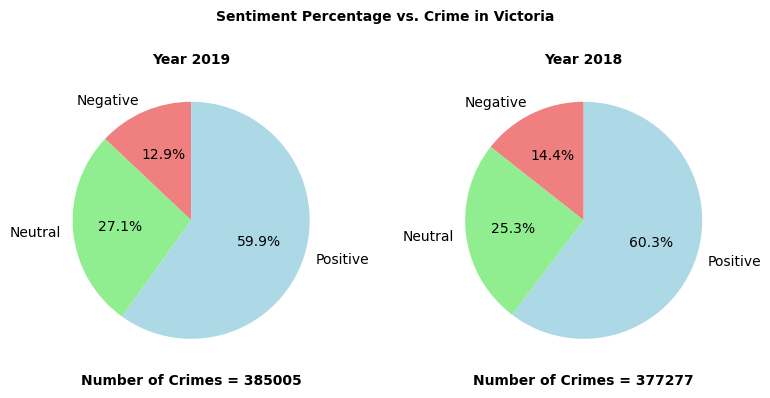

In [7]:
sentiments = ['Negative','Neutral','Positive']
colors = ['#F08080','#90EE90','#ADD8E6']

def plot_pie_chart(data):
    plt.figure(figsize=(8, 4))
    for i, year_data in enumerate(data):
        plt.subplot(1, len(data), i + 1)
        plt.pie(year_data['sentiment_counts'].values(),labels=sentiments,autopct='%1.1f%%',startangle=90, colors=colors)
        plt.gca().set_aspect('equal')
        plt.title(f"Year {year_data['year']}",fontweight='semibold',fontsize=10)
        plt.xlabel(f"Number of Crimes = {year_data['total_crimes']}",fontweight='semibold',fontsize=10)

    plt.suptitle('Sentiment Percentage vs. Crime in Victoria', fontweight='bold', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

data = [
    {'sentiment_counts': {'negative': 2778, 'neutral': 5824, 'positive': 12852}, 'total_crimes': 385005, 'year': 2019},
    {'sentiment_counts': {'negative': 3012, 'neutral': 5303, 'positive': 12631}, 'total_crimes': 377277, 'year': 2018}
]
plot_pie_chart(data)